In [31]:
import re
import pandas as pd
from googletrans import Translator
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from tqdm import tqdm
import os
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import math

###  1.手動でinstagramからコピーしてきたコメントから、コメント部分のみの抽出


34週間前

karina : "giselle adalah penyeimbang getaran aespa" auranya hot banget😭💥

expndomのプロフィール写真

expndom


手動でコピーするとこのようになるため、コメント部分のみ抽出してＣＳＶに格納

### 使用した投稿

aespa1 https://www.instagram.com/p/C7wW9aqvTTq/

aespa2 https://www.instagram.com/p/C7n7A1KPT_T/

aespa3 https://www.instagram.com/p/C7d7_9KPTSC/

aespa4 https://www.instagram.com/p/C7auGE1PX0_/

aespa5 https://www.instagram.com/p/C7UEQYLPMNk/

aespa6 https://www.instagram.com/p/C7JFuBxyij2/

aesap7 https://www.instagram.com/p/C7Gg18nLFpq/

aespa8 https://www.instagram.com/p/C654IvXL6Tf/

In [7]:
# テキストファイルのパスをリストで定義
file_paths = [
    "txt/aespa1.txt",
    "txt/aespa2.txt",
    "txt/aespa3.txt",
    "txt/aespa4.txt",
    "txt/aespa5.txt",
    "txt/aespa6.txt",
    "txt/aespa7.txt",
    "txt/aespa8.txt",
]

# 全コメントを格納するリスト
all_comments = []

# 各ファイルを処理
for file_path in file_paths:
    extracted_comments = []  # 各画像ごとのコメントリスト

    # ファイルを開いて行ごとに読み込む
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    # 数字の次の行を取ってくる
    for i in range(len(lines) - 1):
        if re.search(r"\d+週間前", lines[i]):  # 数字＋"週間前"を検索
            comment = lines[i + 1].strip()  # 次の行を抽出
            if comment:  # コメントが空白でない場合のみ追加
                extracted_comments.append({"Image Name": file_path.split("\\")[-1], "Comment": comment})

    # 各ファイルのコメントを全体リストに追加
    all_comments.extend(extracted_comments)

# データをDataFrameに変換
df = pd.DataFrame(all_comments)

# 結果をCSVに保存
df.to_csv("all_comments3.csv", index=False, encoding="utf-8")
print("すべてのコメントが 'all_comments3.csv' に保存されました！")


すべてのコメントが 'all_comments3.csv' に保存されました！


### 2.英語コメントを抽出



In [8]:
# tqdmをpandasに統合
tqdm.pandas()

# 入力ファイルと出力ディレクトリの設定
input_file_path = 'CSV/all_comments3.csv'  # 入力CSVファイルのパス
output_directory = 'CSV/'  # 出力ディレクトリ
output_file_name = 'english_only_comments2.csv'  # 出力ファイル名
output_file_path = os.path.join(output_directory, output_file_name)

# CSVファイルの読み込み
data = pd.read_csv(input_file_path)
print(f"データの読み込み完了。行数: {len(data)}")

# 英語のコメントだけを抽出する関数
def is_english(comment):
    try:
        return detect(comment) == 'en'  # 英語の場合にTrueを返す
    except LangDetectException:
        return False  # 言語検出が失敗した場合はFalseを返す

# 英語コメントのみをフィルタリング
print("英語のコメントをフィルタリング中")
data['Is_English'] = data['Comment'].astype(str).progress_apply(is_english)

# フィルタリング結果を取得
english_comments = data[data['Is_English'] == True]  # 英語のコメントだけを抽出
print(f"英語のコメント数: {len(english_comments)}")

# 出力ディレクトリが存在しない場合は作成
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    print(f"出力ディレクトリを作成: {output_directory}")

# 結果を新しいCSVとして保存
english_comments.to_csv(output_file_path, index=False, encoding='utf-8-sig')
print(f"英語コメントのみを抽出したデータを {output_file_path} に保存したよー")


データの読み込み完了。行数: 16363
英語のコメントをフィルタリング中


100%|██████████| 16363/16363 [00:43<00:00, 374.42it/s]

英語のコメント数: 2273
英語コメントのみを抽出したデータを CSV/english_only_comments2.csv に保存したよー


In [11]:
# CSVデータの読み込み
data = pd.read_csv("CSV/english_only_comments2.csv")  # 必要に応じてパスを調整

# VADERの初期化
analyzer = SentimentIntensityAnalyzer()

# 感情スコアの計算関数
def calculate_sentiment(comment):
    scores = analyzer.polarity_scores(comment)
    return scores['compound']  # 総合スコア

# 各コメントに感情スコアを計算して新しい列に追加
data['Sentiment Score'] = data['Comment'].apply(calculate_sentiment)

# 人気/不人気を分類
data['Category'] = data['Sentiment Score'].apply(
    lambda x: 'Popular' if x > 0 else 'Unpopular' if x < 0 else 'Neutral'
)

# 結果を確認a
print(data.head())

# 結果を新しいCSVに保存
data.to_csv("sentiment_analysis_results2.csv", index=False, encoding="utf-8")
print("Analysis results saved to 'sentiment_analysis_results.csv'")


       Image Name                             Comment  Is_English  \
0  txt/aespa1.txt    The pinterest girlies are back 😻        True   
1  txt/aespa1.txt                   giselle's mother🔥        True   
2  txt/aespa1.txt             that hot girl is mine 🖤        True   
3  txt/aespa1.txt  GISELLE U'RE SOOO BEAUTIFUL❤️❤️❤️😍        True   
4  txt/aespa1.txt                 NINGNING stop it 😭🫠        True   

   Sentiment Score   Category  
0           0.4588    Popular  
1          -0.3400  Unpopular  
2           0.6369    Popular  
3           0.8240    Popular  
4          -0.6486  Unpopular  
Analysis results saved to 'sentiment_analysis_results.csv'


In [14]:
# 画像ごとの平均スコアを計算
image_sentiment = data.groupby('Image Name')['Sentiment Score'].mean().reset_index()

# 人気/不人気を分類
image_sentiment['Category'] = image_sentiment['Sentiment Score'].apply(
    lambda x: 'Popular' if x > 0 else 'Unpopular' if x < 0 else 'Neutral'
)

# 結果
print(image_sentiment)




       Image Name  Sentiment Score Category
0  txt/aespa1.txt         0.127018  Popular
1  txt/aespa2.txt         0.310200  Popular
2  txt/aespa3.txt         0.099909  Popular
3  txt/aespa4.txt         0.093828  Popular
4  txt/aespa5.txt         0.006985  Popular
5  txt/aespa6.txt         0.299716  Popular
6  txt/aespa7.txt         0.185258  Popular
7  txt/aespa8.txt         0.223237  Popular


In [95]:
# 各画像の感情スコアの中央値を計算
median_scores = image_sentiment.groupby('Image Name')['Sentiment Score'].median().reset_index()
median_scores.rename(columns={'Sentiment Score': 'Median Sentiment Score'}, inplace=True)

# ランキングデータに中央値を追加
image_sentiment_sorted = image_sentiment.sort_values(by='Sentiment Score', ascending=False)
image_sentiment_sorted = image_sentiment_sorted.merge(median_scores, on='Image Name', how='left')

# Rank列を一番右に移動
columns_order = [col for col in image_sentiment_sorted.columns if col != 'Rank'] + ['Rank']
image_sentiment_sorted = image_sentiment_sorted[columns_order]

# 全ランキングを表示
print("Full Popularity Ranking with Median Scores and Rank at the end:")
print(image_sentiment_sorted)

# 全ランキングをCSVに保存
image_sentiment_sorted.to_csv("image_popularity_full_ranking_with_median.csv", index=False, encoding="utf-8")
print("Full ranking saved to 'image_popularity_full_ranking_with_median.csv'")

Full Popularity Ranking with Median Scores and Rank at the end:
       Image Name  Sentiment Score Category  Median Sentiment Score  Rank
0  txt/aespa2.txt         0.310200  Popular                0.310200   1.0
1  txt/aespa6.txt         0.299716  Popular                0.299716   2.0
2  txt/aespa8.txt         0.223237  Popular                0.223237   3.0
3  txt/aespa7.txt         0.185258  Popular                0.185258   4.0
4  txt/aespa1.txt         0.127018  Popular                0.127018   5.0
5  txt/aespa3.txt         0.099909  Popular                0.099909   6.0
6  txt/aespa4.txt         0.093828  Popular                0.093828   7.0
7  txt/aespa5.txt         0.006985  Popular                0.006985   8.0
Full ranking saved to 'image_popularity_full_ranking_with_median.csv'


In [92]:
import pandas as pd

# 各画像ごとの感情スコアの中央値を計算
median_scores = data.groupby("Image Name")["Sentiment Score"].median().reset_index()

# 列の名前を分かりやすく変更
median_scores.rename(columns={"Sentiment Score": "Median Sentiment Score"}, inplace=True)

# 結果を表示
print(median_scores)


       Image Name  Median Sentiment Score
0  txt/aespa1.txt                 0.00000
1  txt/aespa2.txt                 0.27435
2  txt/aespa3.txt                 0.00000
3  txt/aespa4.txt                 0.00000
4  txt/aespa5.txt                 0.00000
5  txt/aespa6.txt                 0.36120
6  txt/aespa7.txt                 0.00000
7  txt/aespa8.txt                 0.17790


##  散布図じゃなくてヒストグラム

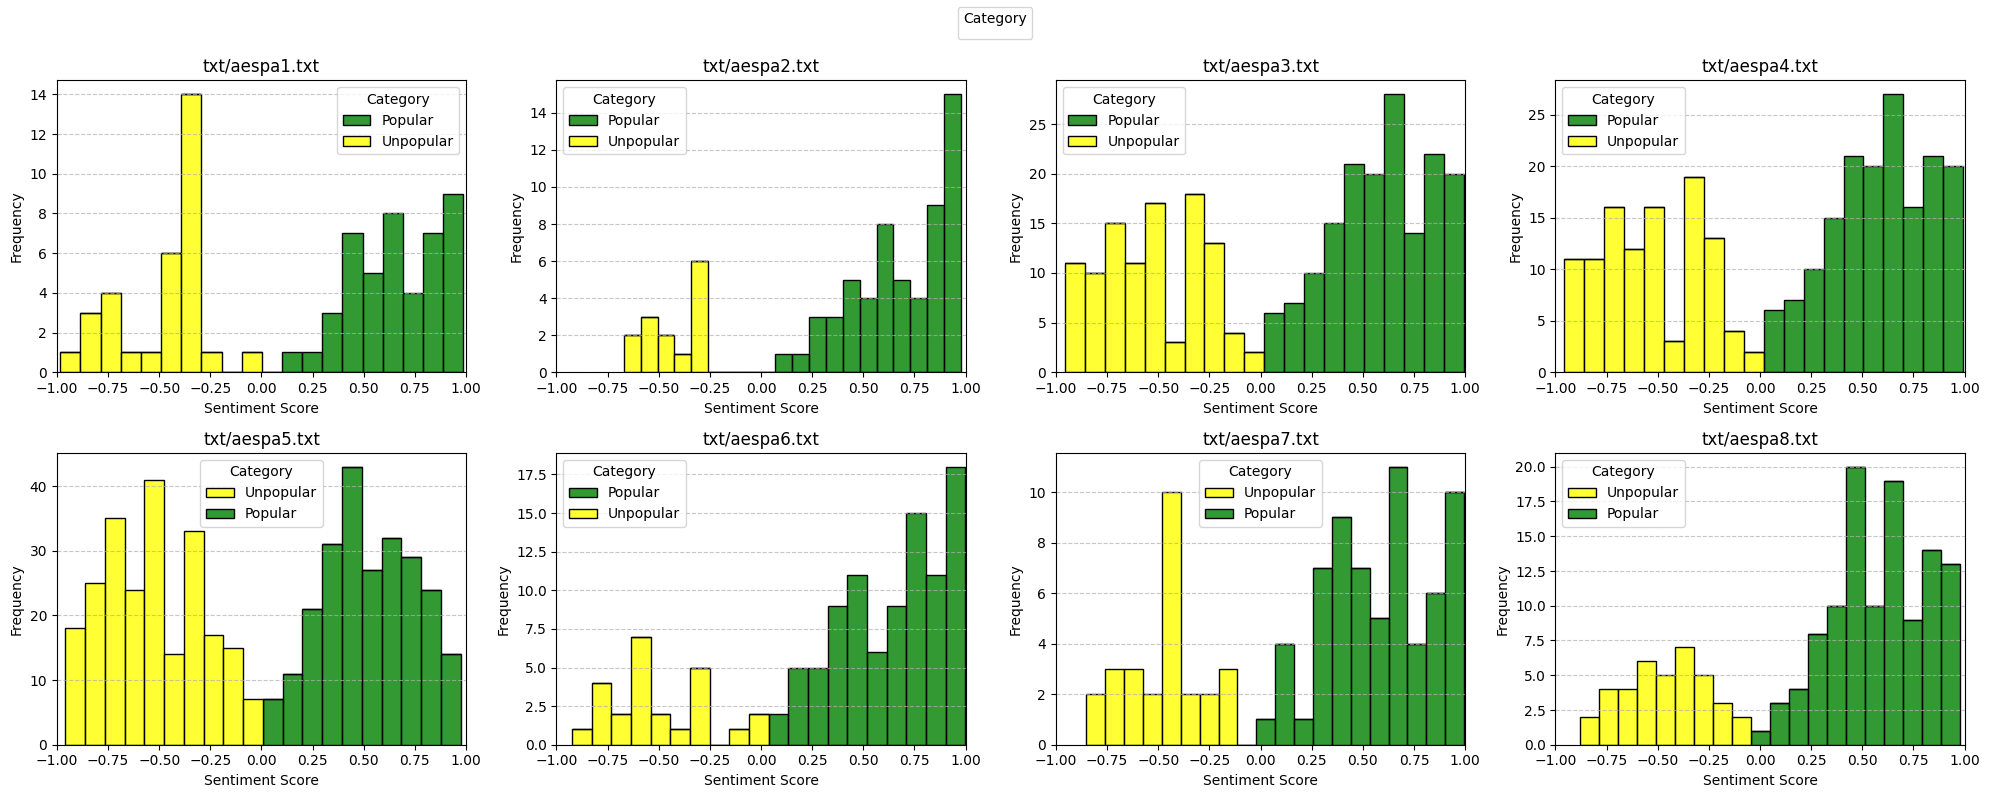

In [82]:
# グラフを配置する行数と列数を計算
num_images = data["Image Name"].nunique()
cols = 4  # 1行に表示するグラフの数
rows = math.ceil(num_images / cols)  # 行数を計算

# カラーパレットを設定
category_colors = {"Popular": "green", "Unpopular": "yellow"}  # Neutralは削除

# 全体の図のサイズを設定
plt.figure(figsize=(cols * 5, rows * 4))

# 各画像ごとにサブプロットを作成
for i, (image_name, group_data) in enumerate(data.groupby("Image Name"), 1):
    plt.subplot(rows, cols, i)  # サブプロットを指定

    # Neutral以外のカテゴリをフィルタリング
    filtered_data = group_data[group_data["Category"] != "Neutral"]
    
    # 各サブプロットにヒストグラムを描画
    sns.histplot(
        data=filtered_data,
        x="Sentiment Score",
        hue="Category",
        palette=category_colors,
        bins=20,  # ビンの数
        kde=False,  # カーネル密度推定を無効化
        multiple="stack",  # カテゴリごとに積み上げる
        alpha=0.8,
        
    )
    
    # 各グラフのタイトルと設定
    plt.title(f"{image_name}", fontsize=12)
    plt.xlabel("Sentiment Score", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xlim(-1, 1)  # VADERのスコア範囲に合わせる
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# 凡例を統一して配置
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper center', ncol=2, title="Category")  # Neutralは含めない

# 全体のレイアウトを調整
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 上部の余白を調整して凡例を収める
plt.show()

ニュートラルな意見は、スコア０になるためグラフから取り除く

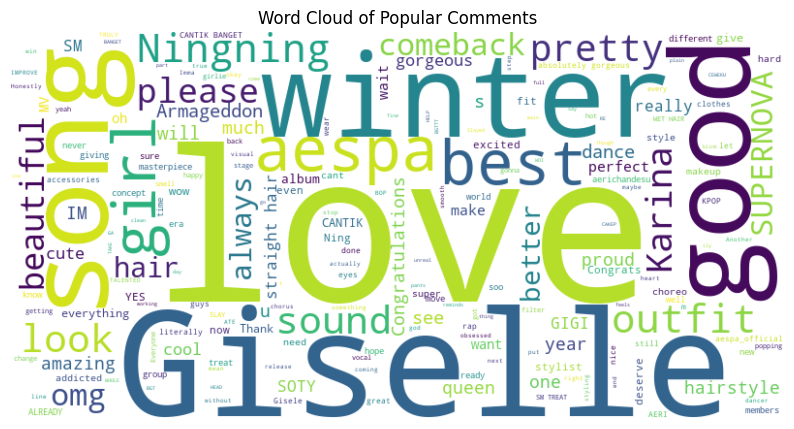

In [26]:
from wordcloud import WordCloud

# 人気コメントのテキストを結合
popular_comments = ' '.join(data[data['Category'] == 'Popular']['Comment'])

# ワードクラウド作成
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(popular_comments)

# 可視化
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Popular Comments')
plt.show()


人ごと　の評価が出ればいいなー
散布図
画像ごとのいい評価と悪い評価のグラフも出す。

In [85]:
from PIL import Image
import os

# 画像が保存されているフォルダ
input_folder = "pic"
output_folder = "resized_images"
target_size = (400,256)  # 統一するサイズ

# 出力フォルダがない場合は作成
os.makedirs(output_folder, exist_ok=True)

# 画像をリサイズ
for filename in os.listdir(input_folder):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        
        # リサイズ
        img_resized = img.resize(target_size, Image.LANCZOS)

        # 保存
        img_resized.save(os.path.join(output_folder, filename))

print("画像のリサイズが完了しました。")

画像のリサイズが完了しました。
